## Setup

Some additional setup setps required to make the notebook run in both python 2 and 3. It also imports required packages and configures MatplotLib plots.

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make the notebook's output stable across runs
np.random.seed(42)

# mpl configs
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "linear_model"

def save_fig(fig_id, tight_layout=True):
    parent_path = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
    path = os.path.join(parent_path, fig_id + ".png")
    if not os.path.isdir(parent_path):
        os.makedirs(parent_path)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

# ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear regression using Normal Equation

In [2]:
X = 2 * np.random.rand(100,1) #uniform distribution(0,1)
y = 4 + 3 * X + np.random.randn(100,1) # standard normal distribution

Saving figure normal_eqaution_plot_1


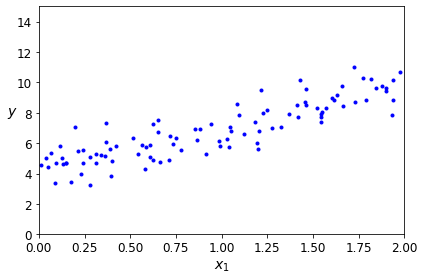

In [8]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([0,2,0,15])
save_fig("normal_eqaution_plot_1")
plt.show()

In [9]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

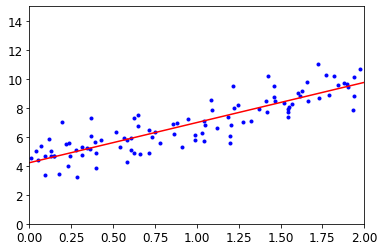

In [16]:
plt.plot(X,y,"b.")
plt.plot(X_new, y_predict,"r-")
plt.axis([0,2,0,15])
plt.show()

Saving figure linear_model_predictions


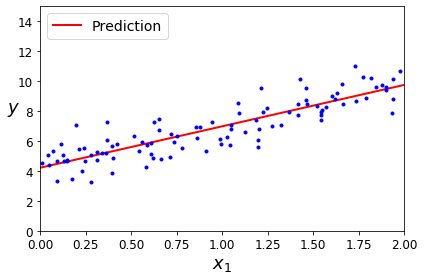

In [20]:
plt.plot(X_new,y_predict,"r-", linewidth=2, label="Prediction")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [22]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Different from using normal equation (as X.T.dot(X) may not be invertible sometimes e.g. having more features than data m>n). LinearRegression actually computes the pseudoinverse of X via SVD (matrix decomposition). 

Normal Equation is typically about O(n^2.4) to O(n^3)
SVD approach is about O(n^2)

But both will perform quite slow if the number of fetures grows large. 

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [24]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## Linear regression using batch gradient descent

In [25]:
eta = 0.1 # learning rate
n_iterations = 1000 # no. of iterations
m = 100 # no. of inputs
theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta -= eta*gradients

In [26]:
theta

array([[4.21509616],
       [2.77011339]])

In [27]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [32]:
theta_path_bdg = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
        plt.xlabel("$x_1$", fontsize=18)
        plt.axis([0,2,0,15])
        plt.title(r"$\eta={}$".format(eta), fontsize=16) 

Saving figure gradient_descent_plot


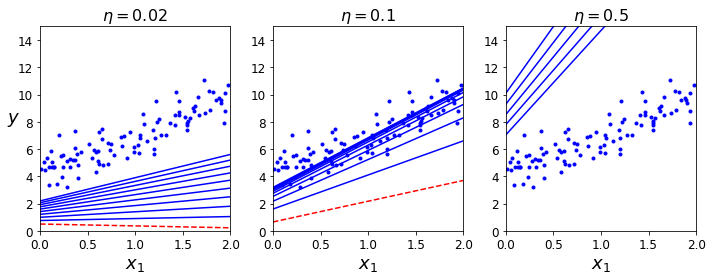

In [36]:
np.random.seed(42)
theta = np.random.randn(2,1) # random intialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
theta = np.random.randn(2,1)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path = theta_path_bdg)
theta = np.random.randn(2,1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()